In [1]:
import local_models.local_models
import local_models.loggin
import local_models.TLS_models
import local_models.linear_projections
import local_models.TLS_models
import local_models.utils
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model
import sklearn.cluster
from importlib import reload
from ml_battery.utils import cmap
import matplotlib as mpl
import sklearn.datasets
import sklearn.decomposition
import logging
import ml_battery.log
import time
import os
from IPython.display import Markdown as md
from mpl_toolkits.mplot3d import Axes3D

logger = logging.getLogger(__name__)

reload(local_models.local_models)
#reload(lm)
#reload(local_models.loggin)
#reload(local_models.TLS_models)
np.warnings.filterwarnings('ignore')


In [2]:
mpl.rcParams['figure.figsize'] = [32.0, 32.0]

In [3]:
def random_sphere(n, radius=1, noise=0.1):
    '''generate a random normal 3-vector, then shrink to unit length'''
    pts = np.random.normal(size=(n,3))
    lengths = (np.einsum('ij,ij->i',pts,pts))**0.5
    return (pts/lengths[:,None]*radius)*(1+np.random.normal(0,noise,size=(n,1)))

In [4]:
RUN=1
K = 3
n = 400
RADII = [0.5,1]
NOISE = 0.1
SEED = 1
np.random.seed(SEED)
KERNEL=local_models.local_models.TriCubeKernel
spheres_data = np.concatenate([random_sphere(int(n/len(RADII)), r, NOISE) for r in RADII], axis=0)
c = np.concatenate([np.ones(int(n/len(RADII)))*i for i in range(len(RADII))], axis=0)

In [5]:
project_dir = os.path.join("..","data","spheres","n{:05d}_seed{:05d}_noise{:08.4f}_s{:02d}_k{}_md".format(
    n, SEED, NOISE, len(RADII), KERNEL.__name__
), "run_{:05d}".format(RUN))
os.makedirs(project_dir, exist_ok=1)

In [6]:
spheres_data.shape

(400, 3)

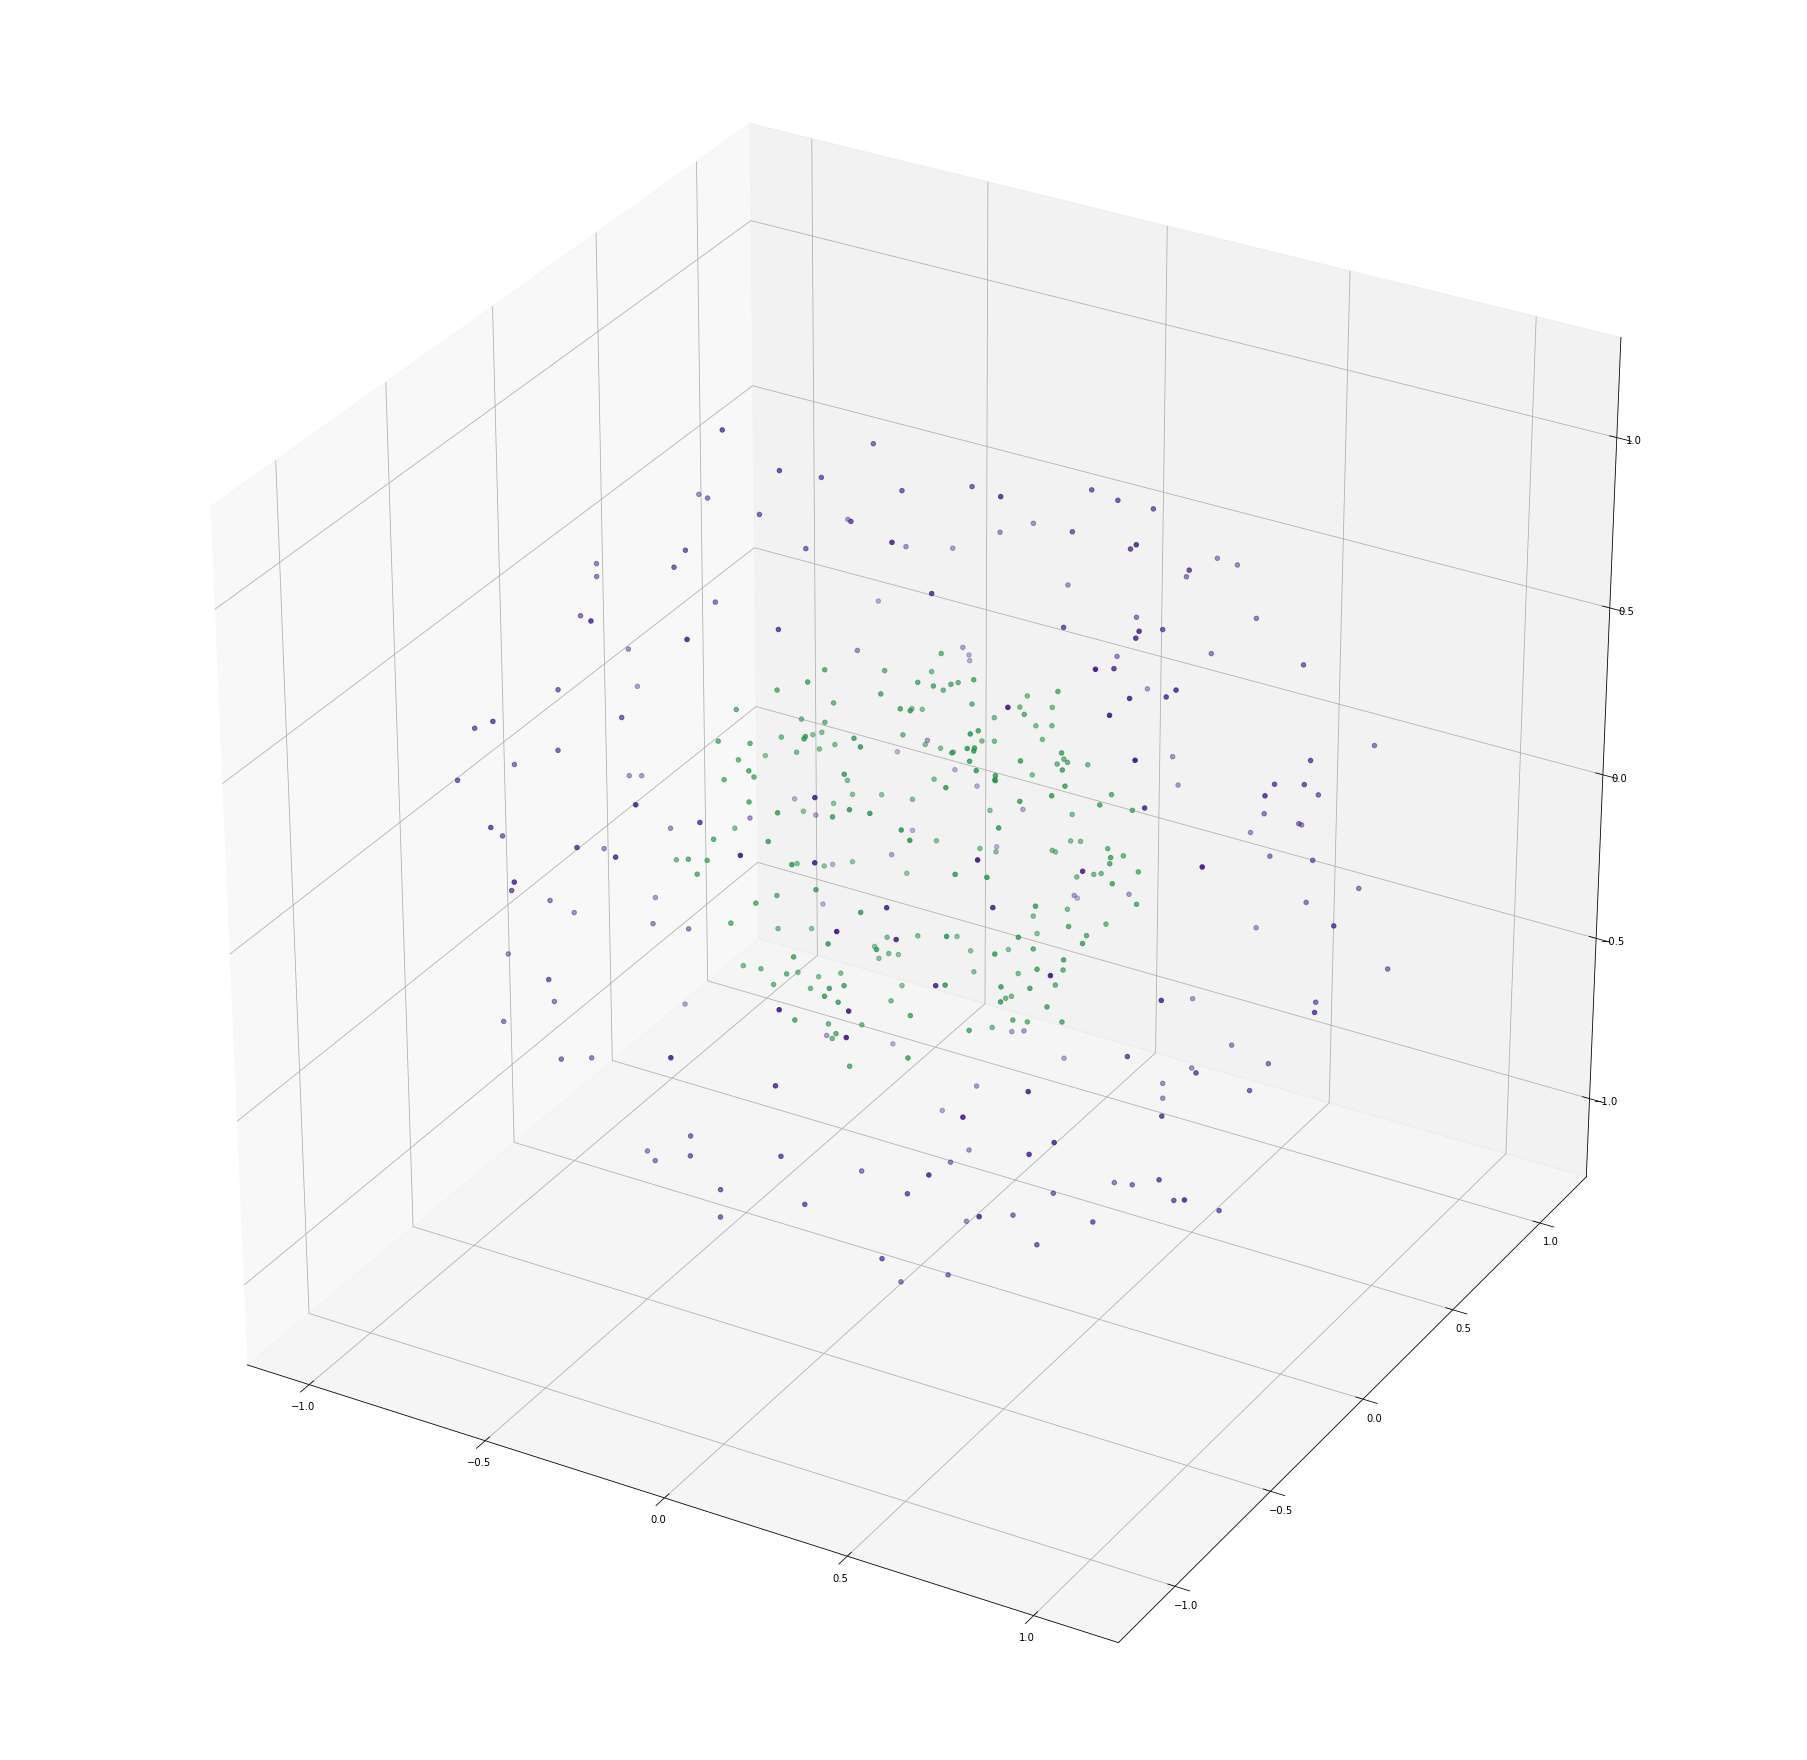

In [7]:
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
ax.scatter(spheres_data[:,0], spheres_data[:,1], spheres_data[:,2], c=cmap(c))
plt.show()

In [8]:
linear_models = local_models.local_models.LocalModels(local_models.TLS_models.LinearODR_mD(2))
linear_models.fit(spheres_data)

In [9]:
%%capture
fig_dir_lines = os.path.join(project_dir, "odr_various_bandwidth")
local_models.linear_projections.make_local_odr_surfaces_animation_3d(linear_models, spheres_data, c, fig_dir_lines, 
    np.concatenate((np.linspace(0.03,0.3,20,endpoint=False), 
                    np.linspace(0.3,1,20,endpoint=False), 
                    np.linspace(1,5,20,endpoint=False))),
                               kernel_cls=KERNEL
)

In [13]:
reload(local_models.linear_projections)

<module 'local_models.linear_projections' from '/home/scott/python_packages/local_models/local_models/linear_projections.py'>

NameError: name 'linear_params_grid' is not defined

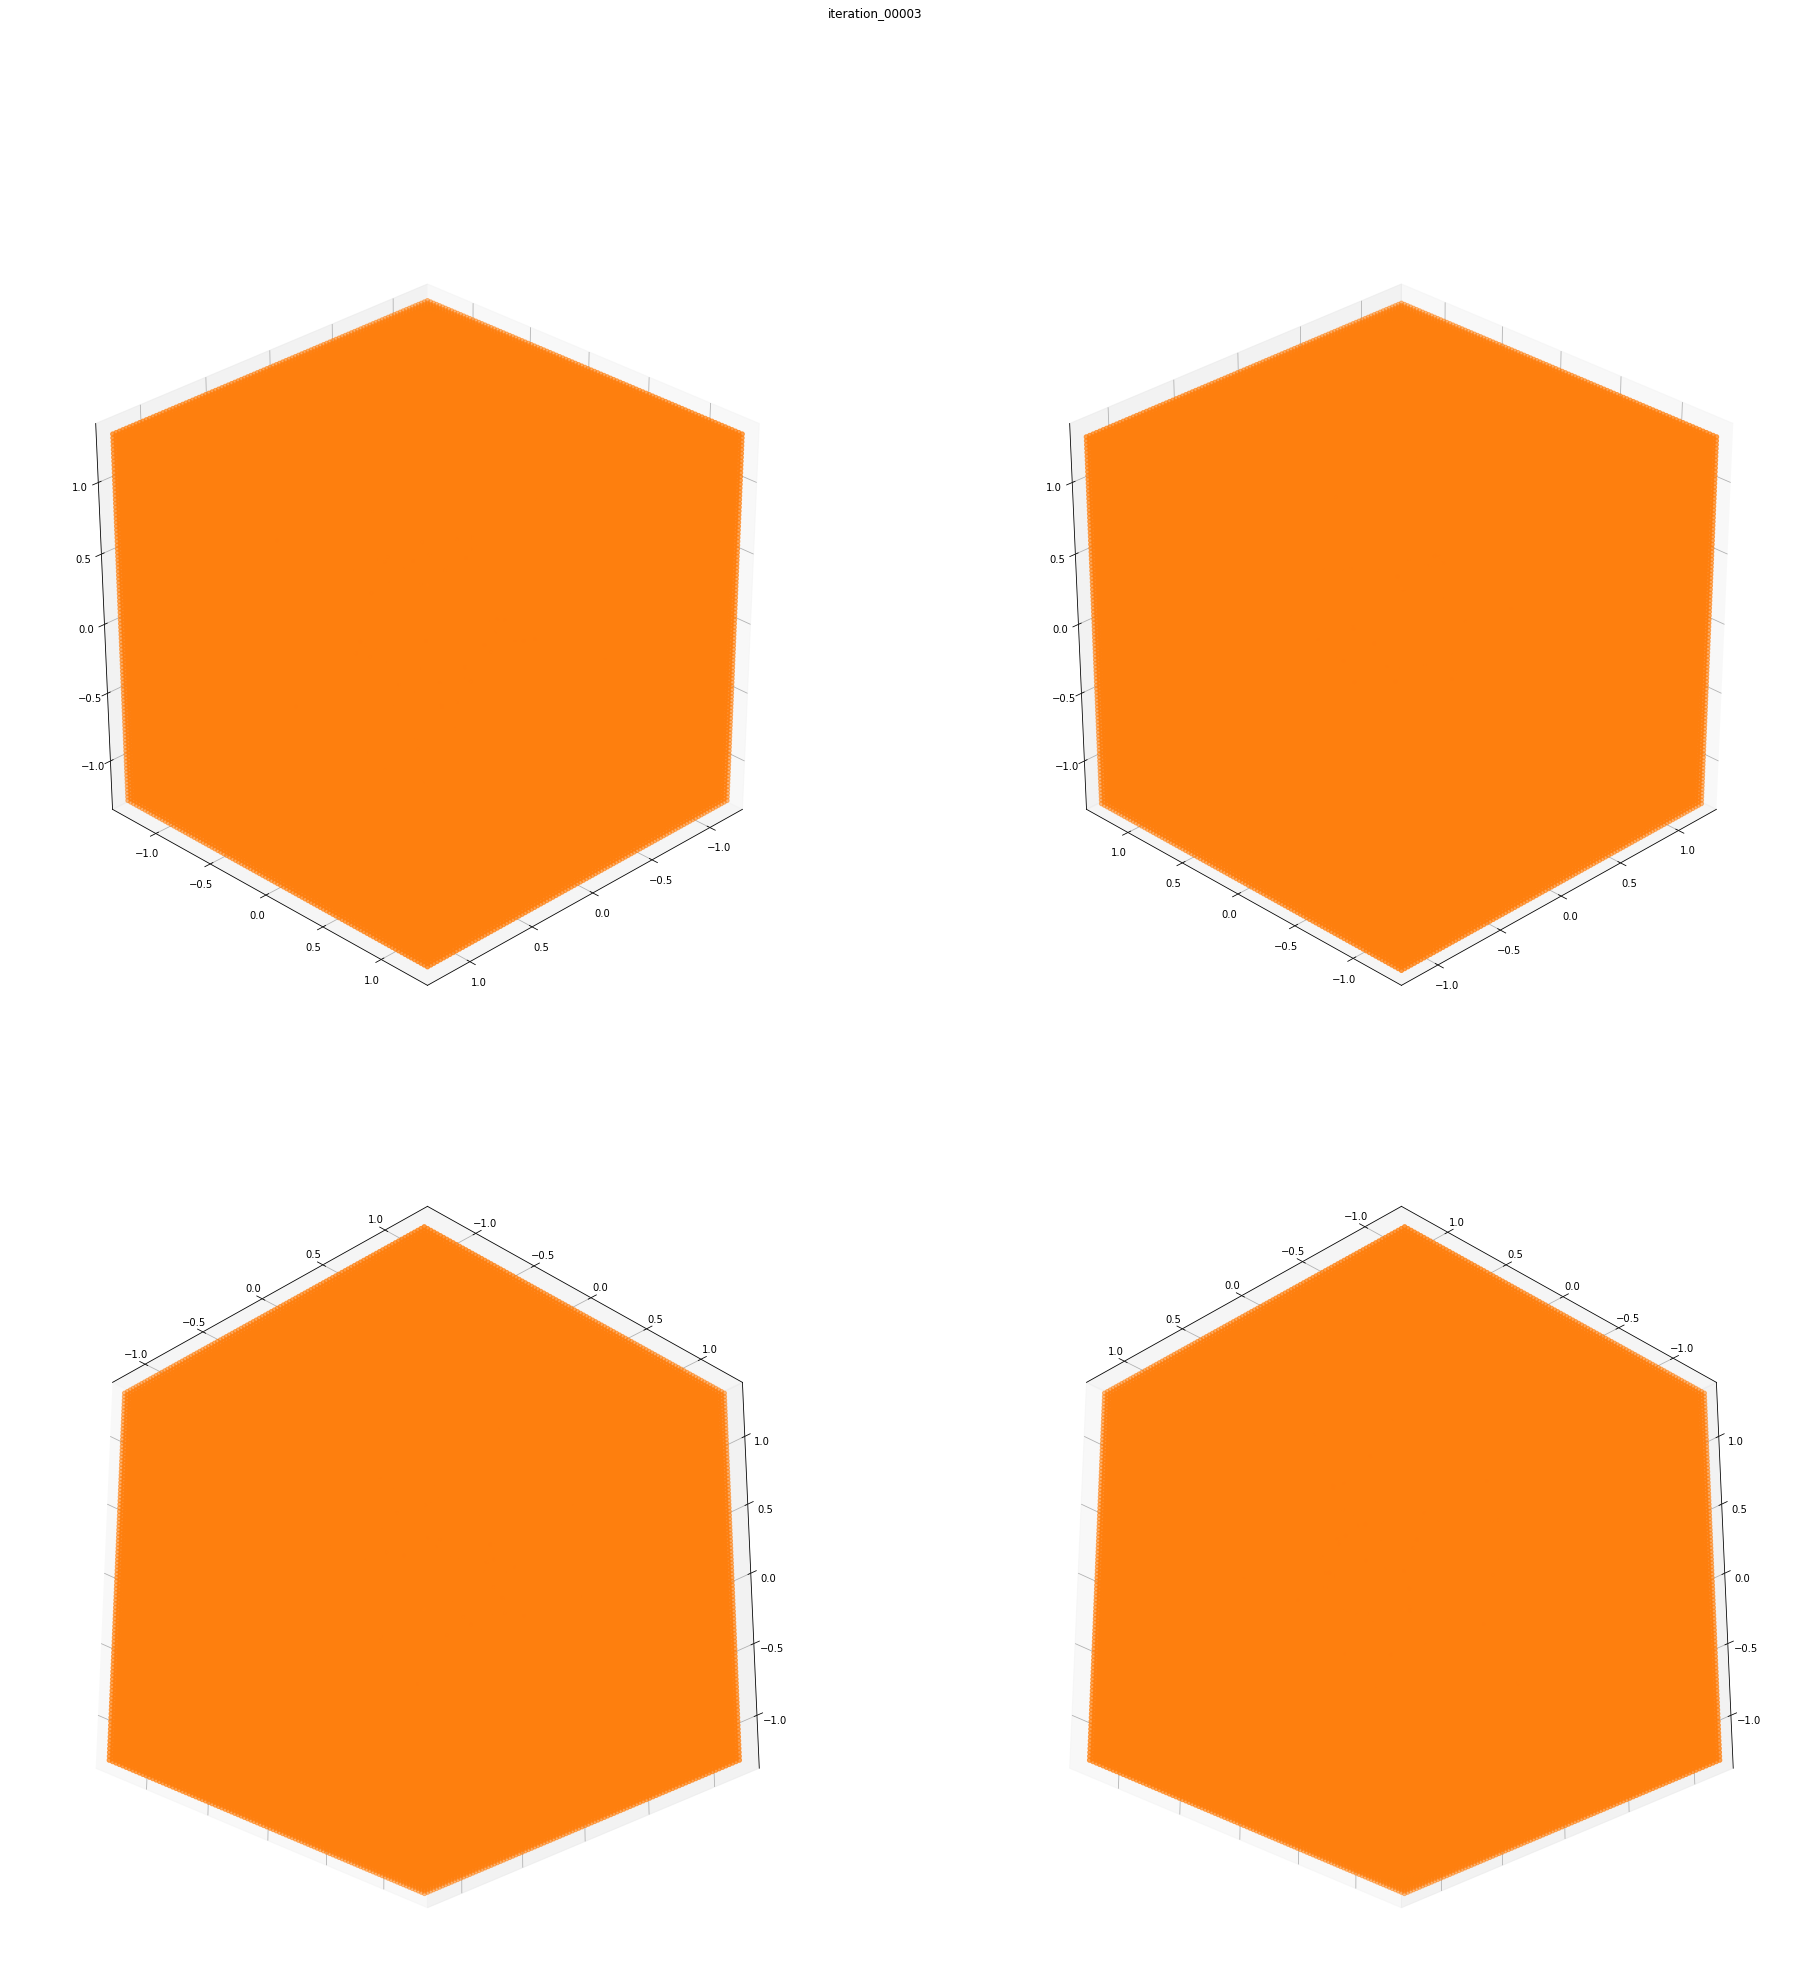

In [14]:
BANDWIDTH = 0.79
N_STEPS = 100
fig_dir_iterprojections = os.path.join(project_dir, "odr_projections_iteration_b{:.4f}_g{:05d}".format(BANDWIDTH,N_STEPS))
local_models.linear_projections.make_odr_iterprojections_animation_3d(linear_models, spheres_data, c, fig_dir_iterprojections, BANDWIDTH, grid_steps=N_STEPS, kernel=KERNEL)
plt.close()

In [ ]:
local_models.utils.imgs2video(os.path.join(fig_dir_iterprojections,"*.png"),
           os.path.join(fig_dir_iterprojections,"out.mp4"), 10)

In [ ]:
md(local_models.utils.video_html(os.path.join(fig_dir_iterprojections, "out.mp4"))